In [1]:
from IPython.display import display
import numpy as np
import pandas as pd


In [2]:
def nearest_neighbours_clustering(similarity_matrix, cluster_size):
  """Функция объединения методом ближайшего соседа по заданному размеру кластера."""

  n = similarity_matrix.shape[0]
  clusters = [[i] for i in range(n)]

  merged_clusters = []
  merged_matrices = []
  merged_elements = []

  while similarity_matrix.size > 1:
    # Поиск максимального элемента
    flatten_max_index = np.argmax(similarity_matrix)
    i_best, j_best = divmod(int(flatten_max_index), n)

    # Проверка на размер кластера
    max_similarity = similarity_matrix[i_best, j_best]
    if max_similarity < cluster_size:
       break

    # Обновление матрицы подобия
    merged_matrix_shape = len(clusters) - 1
    merged_matrix = np.full((merged_matrix_shape, merged_matrix_shape), -2.)
    for k in range(merged_matrix_shape):
      for l in range(k + 1, merged_matrix_shape):
        if k == i_best:
            merged_matrix[k][l] = max(
               similarity_matrix[i_best][l + 1],
               similarity_matrix[j_best][l + 1],
            )
        elif l == i_best:
             merged_matrix[k][l] = max(
               similarity_matrix[k][i_best],
               similarity_matrix[k][j_best],
            )
        elif k < i_best:
            merged_matrix[k][l] = similarity_matrix[k][l]
        else:
            merged_matrix[k][l] = similarity_matrix[k + 1][l + 1]

    # Сохраняем, как этап объединения
    merged_matrices.append(merged_matrix)
    merged_elements.append((clusters[i_best], clusters[j_best]))

    # Обновляем перечень кластеров в соответствии с новым объединением
    clusters[i_best] = [*clusters[i_best], *clusters[j_best]]
    clusters = [c for c in clusters if c != clusters[j_best]]
    merged_clusters.append(list(clusters))

    similarity_matrix = merged_matrix

  return merged_matrices, merged_elements, merged_clusters


In [3]:
# Входные данные
input_data = np.array(
  [
    [-2, 0.95, 0.9, 0.85, 0.8],
    [-2, -2, 0.75, 0.7, 0.65],
    [-2, -2, -2, 0.6, 0.8],
    [-2, -2, -2, -2, 0.7],
    [-2, -2, -2, -2, -2],
  ],
  dtype=float,
)
input_data


array([[-2.  ,  0.95,  0.9 ,  0.85,  0.8 ],
       [-2.  , -2.  ,  0.75,  0.7 ,  0.65],
       [-2.  , -2.  , -2.  ,  0.6 ,  0.8 ],
       [-2.  , -2.  , -2.  , -2.  ,  0.7 ],
       [-2.  , -2.  , -2.  , -2.  , -2.  ]])

# Объединения по методу ближайших соседей

In [4]:
cluster_size = 0.85
merged_matrices, merged_elements, merged_clusters = nearest_neighbours_clustering(input_data, cluster_size)

for i, matrix in enumerate(merged_matrices):
  display(f'Объединение {i + 1}: элементы {merged_elements[i]}')
  index = [str(element) for element in merged_clusters[i]]
  df = pd.DataFrame(matrix, index=index, columns=index)
  display(df)


'Объединение 1: элементы ([0], [1])'

,"[0, 1]",[2],[3],[4]
"[0, 1]",-2.0,0.9,0.85,0.8
[2],-2.0,-2.0,0.60,0.8
[3],-2.0,-2.0,-2.00,0.7
[4],-2.0,-2.0,-2.00,-2.0


'Объединение 2: элементы ([0, 1], [2])'

,"[0, 1, 2]",[3],[4]
"[0, 1, 2]",-2.0,0.85,0.8
[3],-2.0,-2.00,0.7
[4],-2.0,-2.00,-2.0


'Объединение 3: элементы ([0, 1, 2], [3])'

,"[0, 1, 2, 3]",[4]
"[0, 1, 2, 3]",-2.0,0.8
[4],-2.0,-2.0


# Проверка вычислений. Построение дендрограммы.

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [6]:
prepared_input_data = np.ravel(input_data)
prepared_input_data = np.delete(
    prepared_input_data,
    np.argwhere(prepared_input_data == -2.),
)
prepared_input_data

array([0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.8 , 0.7 ])

In [7]:
# Модуль scipy строит дендрограмму исходя из расстояний, а не абсолютных значений.
prepared_input_data = 1. - prepared_input_data

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75]],
 'dcoord': [[0.0,
   np.float64(0.050000000000000044),
   np.float64(0.050000000000000044),
   0.0],
  [0.0,
   np.float64(0.09999999999999998),
   np.float64(0.09999999999999998),
   np.float64(0.050000000000000044)],
  [0.0,
   np.float64(0.15000000000000002),
   np.float64(0.15000000000000002),
   np.float64(0.09999999999999998)],
  [0.0,
   np.float64(0.19999999999999996),
   np.float64(0.19999999999999996),
   np.float64(0.15000000000000002)]],
 'ivl': ['4', '3', '2', '0', '1'],
 'leaves': [4, 3, 2, 0, 1],
 'color_list': ['C1', 'C1', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C1', 'C1', 'C1']}

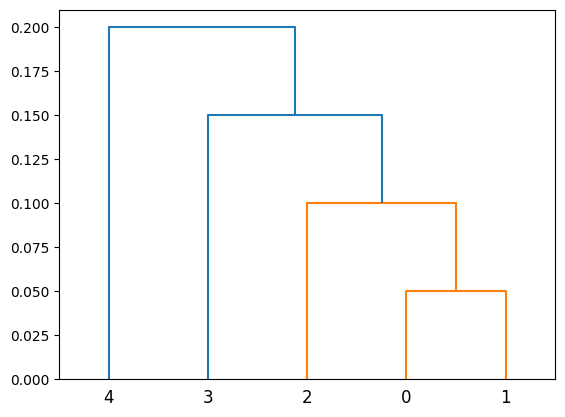

In [8]:
dendrogram(linkage(prepared_input_data, method='single', metric='cosine'))